In [1]:
#under this we will understand the inflow into Karantaka from the global level ( Table 29)

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_excel("Data from 2019-2022 excel files (copy)/Tourism-Statistics-for-year-2022.xlsx" ,sheet_name = "Table 29", skiprows = 3)

In [4]:
#converting the right columns

df.columns = ["NaN","States/UTs","Domestic_2021","Foreign_2021","Domestic_2022","Foreign_2022","NaN","NaN","DTV_22","FTV_22"]

In [5]:
#droping unwanted rows and columns 

df = df.drop("NaN", axis = 1) 
df = df.dropna()

In [6]:
#droping total row at the end 

df = df[~df['States/UTs'].str.contains("Total")]

In [7]:
#sorting values according to the need 

df = df.sort_values("DTV_22", ascending = False).head(10)
df.reset_index(drop=True, inplace=True)

In [8]:
#calculate rest of the precentage 
remain_dtv = 100-np.round(df['DTV_22'].sum(), 2)
remain_ftv = 100-np.round(df['FTV_22'].sum(), 2)

In [9]:
#adding a extrac row for rest of the states 

df.loc[len(df)] = ["others", np.nan, np.nan, np.nan, np.nan, remain_dtv, remain_ftv]

In [10]:
#data extraction for plotting 

states = df["States/UTs"]
dom_21= df["Domestic_2021"]
for_21= df["Foreign_2021"]
dom_22= df["Domestic_2022"]
for_22= df["Foreign_2022"]
dtv_22= df["DTV_22"]
ftv_22= df["FTV_22"]

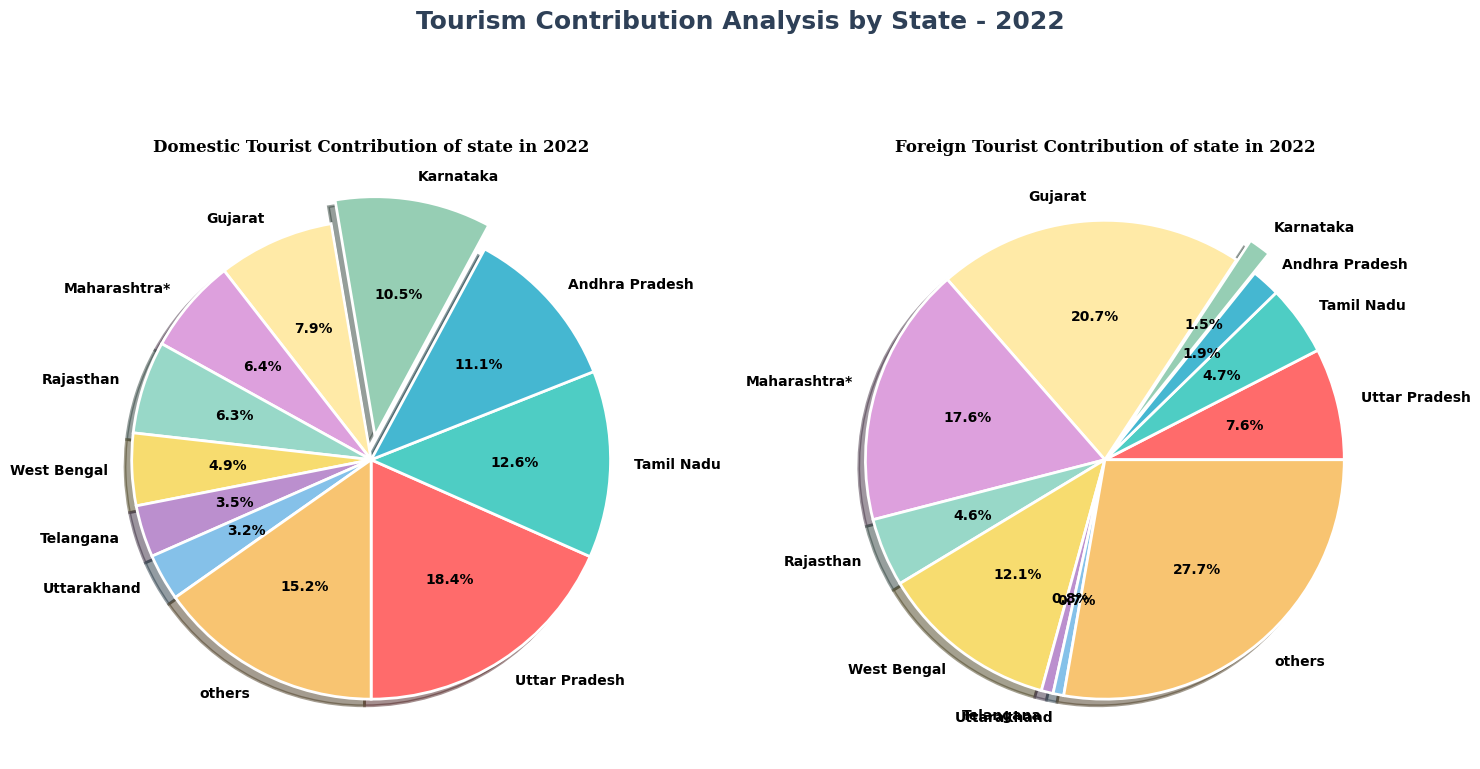

In [11]:
# creating the pie chart for both DTV and FTV separately 

plt.figure(figsize = (15,10))
color = [
    '#FF6B6B',  # Coral red
    '#4ECDC4',  # Turquoise
    '#45B7D1',  # Blue
    '#96CEB4',  # Mint green
    '#FFEAA7',  # Light yellow
    '#DDA0DD',  # Plum
    '#98D8C8',  # Seafoam
    '#F7DC6F',  # Gold
    '#BB8FCE',  # Lavender
    '#85C1E9',  # Light blue
    '#F8C471'   # Peach
]

explode = [0,0,0,0.1,0,0,0,0,0,0,0]
plt.subplot(1,2,1)

#Domestic tourist visit contribution of states in 2022
plt.pie(dtv_22,
        labels = states,
        autopct='%1.1f%%',
        shadow = True,
        colors = color,
        explode = explode,
        startangle = 270,
        wedgeprops={'edgecolor': 'white', 'linewidth': 2},
        textprops={'fontsize': 10, 'fontweight': 'bold'}
       )
plt.title("Domestic Tourist Contribution of state in 2022", fontfamily = "serif", fontsize = 12, fontweight = 'bold')

plt.subplot(1,2,2)
        
#Foreign tourist visit contribution of states in 2022
plt.pie(ftv_22,
        labels = states,
        autopct='%1.1f%%',
        shadow = True,
        colors = color,
        explode = explode,
        startangle = 0,
        wedgeprops={'edgecolor': 'white', 'linewidth': 2},
        textprops={'fontsize': 10, 'fontweight': 'bold'}
       )        

plt.title("Foreign Tourist Contribution of state in 2022", fontfamily = "serif", fontsize = 12, fontweight = 'bold')


#Final needs 
plt.tight_layout()
plt.suptitle('Tourism Contribution Analysis by State - 2022', 
             fontsize=18, fontweight='bold', y=0.95, color='#2E4057')

plt.savefig('Tourism Contribution Analysis by State - 2022.png', 
            dpi=300,                    # High resolution
            bbox_inches='tight',        # Remove extra whitespace
            facecolor='white',          # White background
            edgecolor='none',           # No border
            pad_inches=0.1)             # Small padding

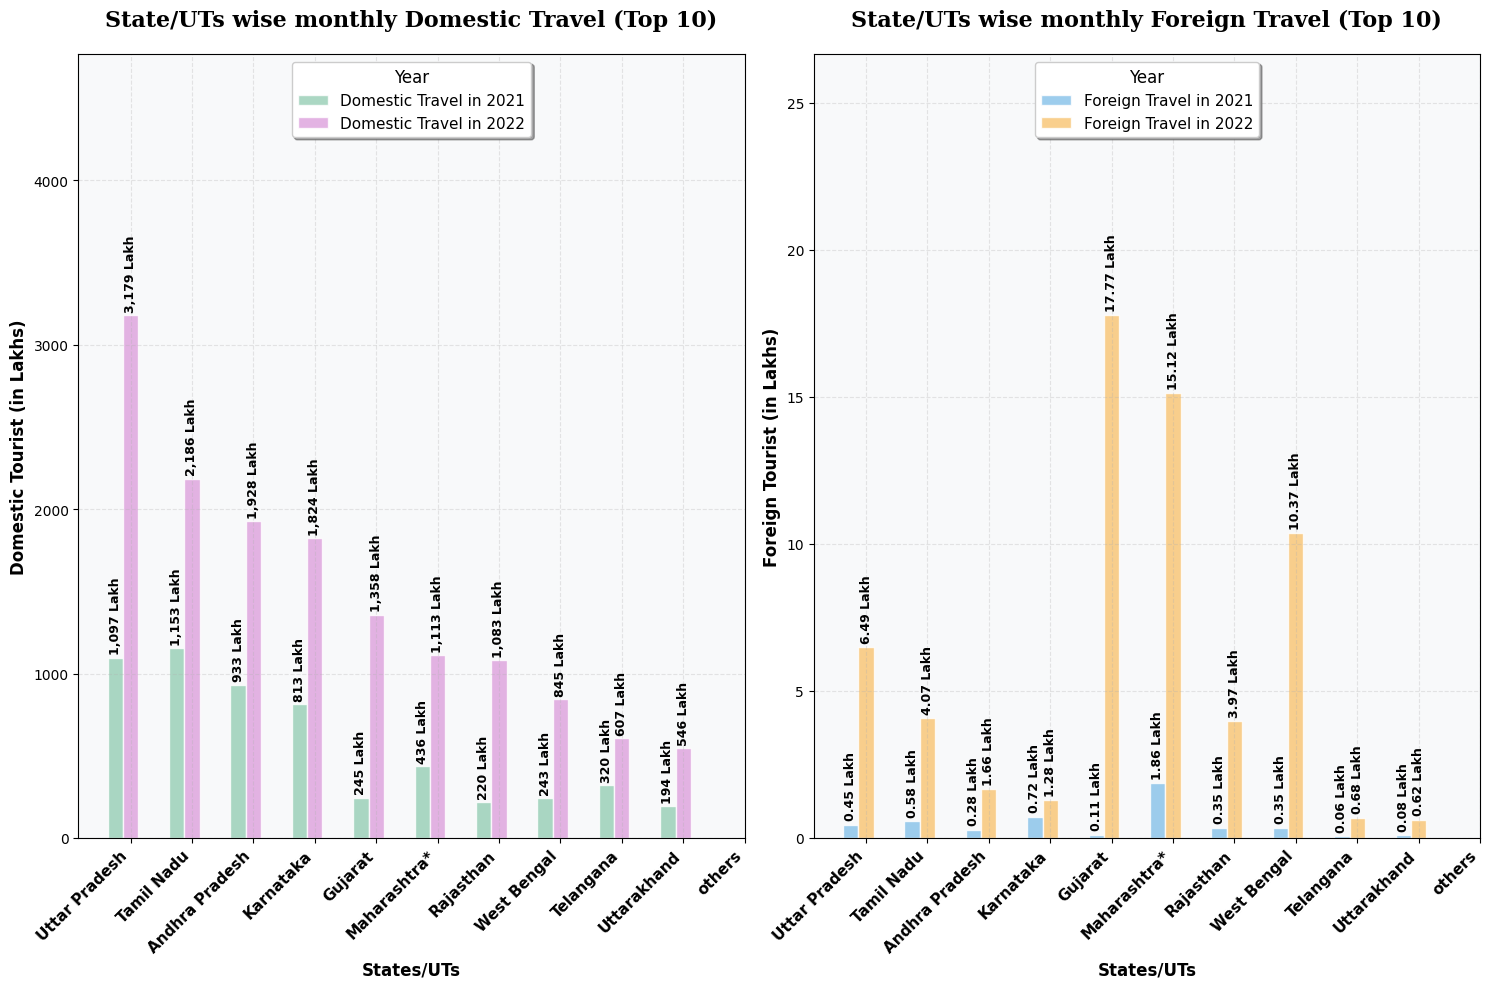

In [39]:
#plotting bar chart for rest of the domestic and foreign

plt.figure(figsize = (15,10))
color = [
    '#96CEB4',  # Mint green
    '#DDA0DD',  # Plum
    '#85C1E9',  # Light blue
    '#F8C471'   # Peach
]

#preparing the data for analysis 

x = np.arange(len(states))
width = 0.25


#creating the subplot for better visualization 

plt.subplot(1,2,1)

bars1 = plt.bar(x-width, dom_21, width=width, label="Domestic Travel in 2021", 
                color='#96CEB4', alpha=0.8, edgecolor='white', linewidth=1)
bars2 = plt.bar(x, dom_22, width=width, label="Domestic Travel in 2022", 
                color='#DDA0DD', alpha=0.8, edgecolor='white', linewidth=1)

# Add value labels on top of each bar
def add_value_labels(bars, values):
    for bar, value in zip(bars, values):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 20,
                f'{value:,.0f} Lakh', ha='center', va='bottom', 
                fontsize=9, fontweight='bold', rotation=90)

# Apply value labels to all bar groups
add_value_labels(bars1, dom_21)
add_value_labels(bars2, dom_22)

# Customize the plot
plt.xticks(x, states, fontsize=11, fontweight='bold', rotation = 45, ha = 'right')
plt.title("State/UTs wise monthly Domestic Travel (Top 10)", 
          fontfamily="serif", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("States/UTs", fontsize=12, fontweight="bold")
plt.ylabel("Domestic Tourist (in Lakhs)", fontsize=12, fontweight="bold")

# Enhanced legend
plt.legend(loc='upper center', frameon=True, fancybox=True, shadow=True, 
           fontsize=11, title="Year", title_fontsize=12)

# Set y-axis limits to accommodate labels
plt.ylim(0, max(max(dom_21), max(dom_22)) * 1.5)

# Add background color
plt.gca().set_facecolor('#f8f9fa')
plt.grid(True, alpha=0.3, linestyle='--')


plt.subplot(1,2,2)

bars3 = plt.bar(x-width, for_21, width=width, label="Foreign Travel in 2021", 
                color='#85C1E9', alpha=0.8, edgecolor='white', linewidth=1)
bars4 = plt.bar(x, for_22, width=width, label="Foreign Travel in 2022", 
                color='#F8C471', alpha=0.8, edgecolor='white', linewidth=1)

# Add value labels on top of each bar
def add_value_labels(bars, values):
    for bar, value in zip(bars, values):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.15,
                f'{np.round(value,2)} Lakh', ha='center', va='bottom', 
                fontsize=9, fontweight='bold', rotation=90)

# Apply value labels to all bar groups
add_value_labels(bars3, for_21)
add_value_labels(bars4, for_22)

# Customize the plot
plt.xticks(x, states, fontsize=11, fontweight='bold', rotation = 45, ha = 'right')
plt.title("State/UTs wise monthly Foreign Travel (Top 10)", 
          fontfamily="serif", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("States/UTs", fontsize=12, fontweight="bold")
plt.ylabel("Foreign Tourist (in Lakhs)", fontsize=12, fontweight="bold")

# Enhanced legend
plt.legend(loc='upper center', frameon=True, fancybox=True, shadow=True, 
           fontsize=11, title="Year", title_fontsize=12)

# Set y-axis limits to accommodate labels
plt.ylim(0, max(max(for_21), max(for_22)) * 1.5)

# Add background color
plt.gca().set_facecolor('#f8f9fa')
plt.grid(True, alpha=0.3, linestyle='--')

# Grid and layout
plt.tight_layout()

#saving the plot 

plt.savefig('Top 10 State_UTs in monthly Travel (In Lakh).png', 
            dpi=300,                    # High resolution
            bbox_inches='tight',        # Remove extra whitespace
            facecolor='white',          # White background
            edgecolor='none',           # No border
            pad_inches=0.1)             # Small padding

In [13]:
df

,States/UTs,Domestic_2021,Foreign_2021,Domestic_2022,Foreign_2022,DTV_22,FTV_22
0,Uttar Pradesh,1097.084,0.447,3179.136,6.490,18.37,7.56
1,Tamil Nadu,1153.367,0.576,2185.848,4.071,12.63,4.74
2,Andhra Pradesh,932.776,0.276,1927.670,1.658,11.13,1.93
3,Karnataka,813.337,0.725,1824.132,1.285,10.54,1.50
4,Gujarat,245.252,0.113,1358.113,17.772,7.85,20.70
5,Maharashtra*,435.692,1.856,1112.976,15.116,6.43,17.60
6,Rajasthan,219.887,0.348,1083.282,3.967,6.26,4.62
7,West Bengal,243.260,0.348,845.422,10.370,4.88,12.08
8,Telangana,320.006,0.059,607.484,0.684,3.51,0.80
9,Uttarakhand,194.345,0.085,546.426,0.616,3.16,0.72
